In [27]:
import os 
print("Current working directory:", os.getcwd())

Current working directory: /Users/kithmalgunathillake/Desktop/ecommerce_customer_analytics/notebooks


In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from faker import Faker
fake = Faker()
Faker.seed(42)

plt.style.use('default')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")
print("✓ Ready to start building data science project!")


✓ All libraries imported successfully!
✓ Ready to start building data science project!


In [29]:
# Phase 1: Generate Customer Demographics
print("Creating realistic customer profiles...")

def generate_customers(n_customers=1000):
    """Generate realistic customer demographic data"""
    customers = []
    
    for customer_id in range(1, n_customers + 1):
        customer = {
            'customer_id': customer_id,
            'name': fake.name(),
            'email': fake.email(),
            'phone': fake.phone_number(),
            'city': fake.city(),
            'state': fake.state(),
            'registration_date': fake.date_between(start_date='-2y', end_date='today'),
            'age': np.random.randint(18, 70),
            'gender': np.random.choice(['Male', 'Female'], p=[0.48, 0.52])
        }
        customers.append(customer)
    
    return pd.DataFrame(customers)

# Generate 1000 customers
customers_df = generate_customers(1000)
print(f"✓ Created {len(customers_df)} customers")
print("\nFirst 5 customers:")
print(customers_df.head())

Creating realistic customer profiles...
✓ Created 1000 customers

First 5 customers:
   customer_id           name                        email  \
0            1   Allison Hill     donaldgarcia@example.net   
1            2   Robert Wolfe         joshua35@example.org   
2            3  Matthew Mejia    wyattmichelle@example.com   
3            4    Patty Perez  trujillorichard@example.org   
4            5  Zachary Hicks   camposmichelle@example.org   

                  phone           city         state registration_date  age  \
0       +1-219-560-0133  Robinsonshire     Louisiana        2025-01-20   55   
1          361-855-9407  New Kellystad        Oregon        2023-10-27   60   
2      575-425-5341x928       Grayside          Iowa        2024-10-21   47   
3          495.537.6724   Juliechester  Pennsylvania        2024-03-26   53   
4  +1-326-691-6697x8480  Danielchester        Hawaii        2024-05-05   52   

   gender  
0    Male  
1  Female  
2  Female  
3    Male  
4  Fema

📊 CUSTOMER DATA ANALYSIS
Total customers: 1000
Date range: 2023-06-10 to 2025-06-08
Age range: 18 to 69 years

Gender distribution:
gender
Female    506
Male      494
Name: count, dtype: int64

Top 5 states:
state
West Virginia    29
Mississippi      27
New Hampshire    26
Iowa             26
Illinois         25
Name: count, dtype: int64


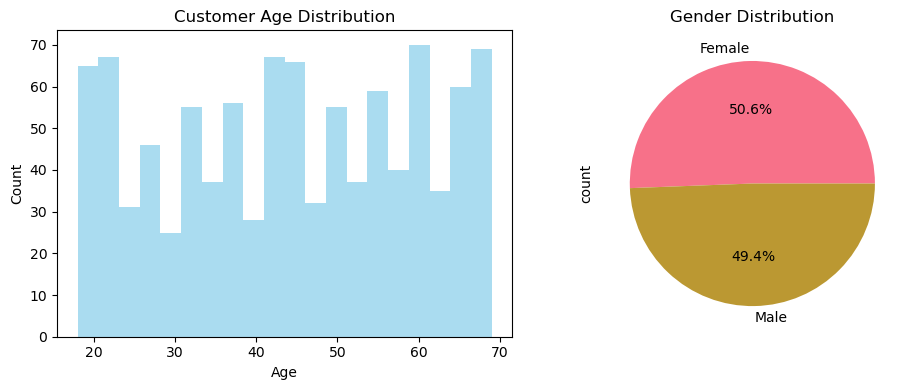

In [30]:
# Let's explore our customer data
print("📊 CUSTOMER DATA ANALYSIS")
print("=" * 40)

print(f"Total customers: {len(customers_df)}")
print(f"Date range: {customers_df['registration_date'].min()} to {customers_df['registration_date'].max()}")
print(f"Age range: {customers_df['age'].min()} to {customers_df['age'].max()} years")

print("\nGender distribution:")
print(customers_df['gender'].value_counts())

print("\nTop 5 states:")
print(customers_df['state'].value_counts().head())

# Visualize age distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(customers_df['age'], bins=20, alpha=0.7, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
customers_df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

In [31]:
# Phase 2: Generate Orders and Order Items
print("Creating realistic e-commerce orders...")

def generate_orders_and_items(customers_df):
    """Generate realistic e-commerce orders with multiple items per order"""
    
    product_catalog = {
        'Electronics': ['iPhone 15', 'MacBook Pro', 'AirPods', 'iPad'],
        'Clothing': ['T-Shirt', 'Jeans', 'Dress', 'Jacket'],
        'Books': ['Fiction Novel', 'Business Book', 'Cookbook'],
        'Home & Garden': ['Coffee Maker', 'Plant Pot', 'Lamp'],
        'Sports': ['Running Shoes', 'Yoga Mat', 'Dumbbells'],
        'Beauty': ['Skincare Set', 'Makeup Kit', 'Perfume']
    }
    
    price_ranges = {
        'Electronics': (50, 1000),
        'Clothing': (20, 200),
        'Books': (10, 50),
        'Home & Garden': (15, 300),
        'Sports': (25, 400),
        'Beauty': (10, 100)
    }
    
    orders = []
    order_items = []
    order_id = 1
    
    for _, customer in customers_df.iterrows():
        customer_type = np.random.choice(['frequent', 'regular', 'occasional'], p=[0.2, 0.5, 0.3])
        
        if customer_type == 'frequent':
            n_orders = np.random.randint(3, 8)
        elif customer_type == 'regular':
            n_orders = np.random.randint(2, 5)
        else:
            n_orders = np.random.randint(1, 3)
        
        for _ in range(n_orders):
            order_date = fake.date_between(start_date=customer['registration_date'], end_date='today')
            
            # Create order
            order = {
                'order_id': order_id,
                'customer_id': customer['customer_id'],
                'order_date': order_date,
                'customer_type': customer_type
            }
            
            # Add items to order
            n_items = np.random.randint(1, 4)
            order_total = 0
            
            for _ in range(n_items):
                category = np.random.choice(list(product_catalog.keys()))
                product_name = np.random.choice(product_catalog[category])
                quantity = np.random.randint(1, 3)
                unit_price = round(np.random.uniform(*price_ranges[category]), 2)
                total_price = round(quantity * unit_price, 2)
                order_total += total_price
                
                order_item = {
                    'order_id': order_id,
                    'product_name': product_name,
                    'product_category': category,
                    'quantity': quantity,
                    'unit_price': unit_price,
                    'total_price': total_price
                }
                order_items.append(order_item)
            
            order['order_total'] = round(order_total, 2)
            order['num_items'] = n_items
            orders.append(order)
            order_id += 1
    
    return pd.DataFrame(orders), pd.DataFrame(order_items)

# Generate orders and items
orders_df, order_items_df = generate_orders_and_items(customers_df)
print(f"✓ Created {len(orders_df)} orders")
print(f"✓ Created {len(order_items_df)} order items")

print("\nFirst 5 orders:")
print(orders_df.head())

print("\nFirst 5 order items:")
print(order_items_df.head())

Creating realistic e-commerce orders...
✓ Created 2894 orders
✓ Created 5695 order items

First 5 orders:
   order_id  customer_id  order_date customer_type  order_total  num_items
0         1            1  2025-03-04      frequent       315.26          2
1         2            1  2025-03-16      frequent       269.42          3
2         3            1  2025-02-22      frequent       153.88          1
3         4            1  2025-02-13      frequent        48.30          1
4         5            1  2025-06-02      frequent       621.14          3

First 5 order items:
   order_id   product_name product_category  quantity  unit_price  total_price
0         1      Dumbbells           Sports         2      140.93       281.86
1         1  Business Book            Books         2       16.70        33.40
2         2          Dress         Clothing         2       96.22       192.44
3         2        Perfume           Beauty         1       20.66        20.66
4         2   Skincare Set 

📊 ORDERS AND ITEMS ANALYSIS
Total orders: 2894
Total items sold: 5695
Total revenue: $1,566,776.24
Average order value: $541.39
Average items per order: 2.0

Orders by customer type:
customer_type
regular       1382
frequent      1025
occasional     487
Name: count, dtype: int64

Top product categories:
product_category
Electronics      997
Home & Garden    965
Beauty           957
Sports           938
Clothing         925
Books            913
Name: count, dtype: int64

Top selling products:
product_name
Skincare Set    338
Dumbbells       334
Plant Pot       332
Makeup Kit      324
Lamp            317
Name: count, dtype: int64


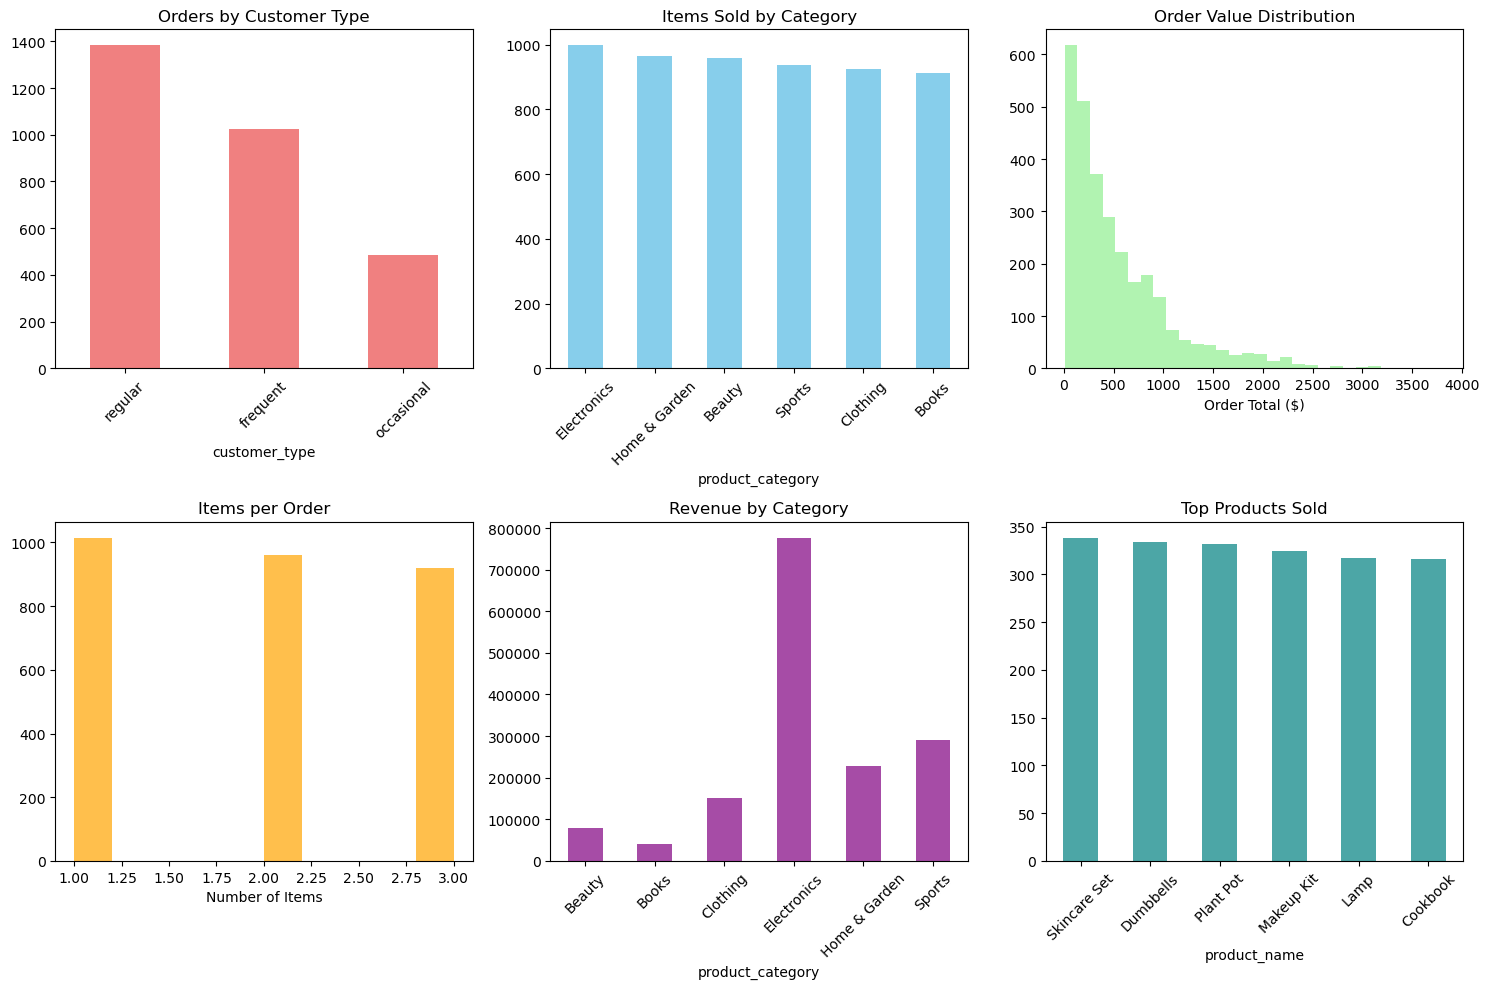

In [32]:
# Analyze the transaction data we just created
print("📊 ORDERS AND ITEMS ANALYSIS")
print("=" * 40)

print(f"Total orders: {len(orders_df)}")
print(f"Total items sold: {len(order_items_df)}")
print(f"Total revenue: ${orders_df['order_total'].sum():,.2f}")
print(f"Average order value: ${orders_df['order_total'].mean():.2f}")
print(f"Average items per order: {len(order_items_df)/len(orders_df):.1f}")

print("\nOrders by customer type:")
print(orders_df['customer_type'].value_counts())

print("\nTop product categories:")
print(order_items_df['product_category'].value_counts())

print("\nTop selling products:")
print(order_items_df['product_name'].value_counts().head())

# NEW VISUALIZATION CODE:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
orders_df['customer_type'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Orders by Customer Type')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
order_items_df['product_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Items Sold by Category')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
plt.hist(orders_df['order_total'], bins=30, alpha=0.7, color='lightgreen')
plt.title('Order Value Distribution')
plt.xlabel('Order Total ($)')

plt.subplot(2, 3, 4)
plt.hist(orders_df['num_items'], bins=10, alpha=0.7, color='orange')
plt.title('Items per Order')
plt.xlabel('Number of Items')

plt.subplot(2, 3, 5)
category_revenue = order_items_df.groupby('product_category')['total_price'].sum()
category_revenue.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Revenue by Category')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
top_products = order_items_df['product_name'].value_counts().head(6)
top_products.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Top Products Sold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [35]:
# Save our generated data
print("Saving data to files...")

# Save to CSV files
customers_df.to_csv('../data/raw/customers.csv', index=False)
orders_df.to_csv('../data/raw/orders.csv', index=False)
order_items_df.to_csv('../data/raw/order_items.csv', index=False)

print("✓ Customers saved to data/raw/customers.csv")
print("✓ Orders saved to data/raw/orders.csv")
print("✓ Order items saved to data/raw/order_items.csv")
print(f"✓ Dataset ready: {len(customers_df)} customers, {len(orders_df)} orders, {len(order_items_df)} items")


Saving data to files...
✓ Customers saved to data/raw/customers.csv
✓ Orders saved to data/raw/orders.csv
✓ Order items saved to data/raw/order_items.csv
✓ Dataset ready: 1000 customers, 2894 orders, 5695 items


In [36]:
# Business Question: Who are our best customers?
print("🎯 BUSINESS ANALYSIS: Customer Value")
print("=" * 40)

# Calculate customer spending
customer_summary = orders_df.groupby('customer_id').agg({
    'order_total': ['sum', 'count', 'mean'],
    'order_date': ['min', 'max']
}).round(2)

# Flatten column names
customer_summary.columns = ['total_spent', 'num_orders', 'avg_order', 'first_purchase', 'last_purchase']

# Add customer names
customer_summary = customer_summary.merge(
    customers_df[['customer_id', 'name']], 
    on='customer_id'
)

# Find top customers
print("TOP 10 CUSTOMERS BY SPENDING:")
top_customers = customer_summary.nlargest(10, 'total_spent')
print(top_customers[['name', 'total_spent', 'num_orders']].to_string())

# Calculate some business metrics
print(f"\nBUSINESS INSIGHTS:")
print(f"Average customer value: ${customer_summary['total_spent'].mean():.2f}")
print(f"Top 10 customers generate: ${top_customers['total_spent'].sum():.2f}")
print(f"That's {(top_customers['total_spent'].sum() / customer_summary['total_spent'].sum() * 100):.1f}% of total revenue!")

🎯 BUSINESS ANALYSIS: Customer Value
TOP 10 CUSTOMERS BY SPENDING:
               name  total_spent  num_orders
917       Mary Choi      6597.79           7
449       Dean Cook      6241.56           7
255     Jody Garcia      5799.98           7
577     Ronald Nash      5799.72           6
869      Jill Kirby      5489.10           4
831      Jenny Soto      5416.14           5
88    Dana Williams      5301.45           6
888   Krista Vargas      5268.14           4
518    Hector Mcgee      5253.22           7
537  Michael Hodges      5198.22           4

BUSINESS INSIGHTS:
Average customer value: $1566.78
Top 10 customers generate: $56365.32
That's 3.6% of total revenue!
